In [3]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 11.3 MB/s eta 0:00:0000:0100:01
  Using cached trio-0.22.0-py3-none-any.whl (384 kB)
  Using cached outcome-1.2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached wsproto-1.2.0-py3-none-any.whl (24 kB)
  Using cached h11-0.14.0-py3-none-any.whl (58 kB)


In [1]:
#import packages


import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon, box
import fiona
import pyproj
import contextily as ctx
import os
import requests
import matplotlib.ticker as ticker
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.ticker import PercentFormatter
import requests
import matplotlib.colors as colors


import matplotlib.pyplot as plt
#%matplotlib inline
from folium.features import DivIcon
import folium
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import MarkerCluster

#%matplotlib widget
%matplotlib inline

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
!ls

## Import Data
- 2020 seattle energy benchmarking data
- campus facilities building layouts

In [2]:
eb= pd.read_csv("2020_Building_Energy_Benchmarking.csv", sep=',')

eb.head()
#list(eb.columns)

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,2020,MAYFLOWER PARK HOTEL,NonResidential,0659000030,405 OLIVE WAY,SEATTLE,WA,98101.0,47.61220,...,NaN,801392,1457837,6326,Compliant,No Issue,2734351.0,632586.0,169.1,1.9
1,2,2020,PARAMOUNT HOTEL,NonResidential,0659000220,724 PINE ST,SEATTLE,WA,98101.0,47.61317,...,4622.0,568667,0,16614,Compliant,No Issue,1940292.0,1661402.0,98.6,1.1
2,3,2020,WESTIN HOTEL (Parent Building),NonResidential,0659000475,1900 5TH AVE,SEATTLE,WA,98101.0,47.61367,...,0.0,7478716,10359896,8955,Compliant,No Issue,25517379.0,895500.0,1043.2,1.4
3,5,2020,HOTEL MAX,NonResidential,0659000640,620 STEWART ST,SEATTLE,WA,98101.0,47.61412,...,NaN,345231,917724,8871,Compliant,No Issue,1177927.0,887059.0,129.6,2.1
4,8,2020,WARWICK SEATTLE HOTEL,NonResidential,0659000970,401 LENORA ST,SEATTLE,WA,98121.0,47.61375,...,0.0,1102452,0,46034,Compliant,No Issue,3761566.0,4603411.0,264.5,2.3


In [17]:
eb.describe() 

,OSEBuildingID,DataYear,ZipCode,Latitude,Longitude,CouncilDistrictCode,YearBuilt,NumberofFloors,NumberofBuildings,PropertyGFATotal,...,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,3628.000000,3628.0,3573.000000,3626.000000,3626.000000,3614.000000,3628.000000,3628.000000,3628.000000,3.628000e+03,...,3.577000e+03,1944.000000,698.000000,3.628000e+03,3.628000e+03,3.628000e+03,3.593000e+03,3.593000e+03,3593.000000,3593.000000
mean,23606.083793,2020.0,98116.720123,47.624840,-122.334778,2.934422,1972.645259,5.025358,1.177784,1.065545e+05,...,8.713314e+04,32199.494342,13866.336676,9.442388e+05,2.942688e+05,1.301159e+04,3.253126e+06,1.313834e+06,111.740273,1.081325
std,14135.114036,0.0,17.087894,0.046891,0.027059,2.284829,34.563418,5.680338,2.253223,2.331381e+05,...,2.852845e+05,59852.830691,30934.217052,2.661996e+06,4.054784e+06,6.838285e+04,9.121277e+06,6.870308e+06,531.287054,1.783603
min,1.000000,2020.0,98101.000000,47.499170,-122.414250,1.000000,1896.000000,0.000000,0.000000,2.000000e+04,...,5.656000e+03,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,20256.500000,2020.0,98105.000000,47.601323,-122.350455,1.000000,1952.000000,3.000000,1.000000,2.952725e+04,...,2.604400e+04,5497.750000,2623.750000,1.769130e+05,0.000000e+00,0.000000e+00,6.134910e+05,0.000000e+00,7.400000,0.200000
50%,23566.500000,2020.0,98115.000000,47.619335,-122.332395,2.000000,1980.000000,4.000000,1.000000,4.718450e+04,...,4.209000e+04,12298.500000,5855.000000,3.289020e+05,0.000000e+00,3.204000e+03,1.137419e+06,3.288730e+05,30.300000,0.600000
75%,26844.250000,2020.0,98122.000000,47.657150,-122.318700,5.000000,2001.000000,6.000000,1.000000,1.012765e+05,...,8.274600e+04,32254.000000,12596.500000,7.712812e+05,0.000000e+00,1.173875e+04,2.655020e+06,1.182451e+06,83.900000,1.300000
max,50697.000000,2020.0,98199.000000,47.733870,-122.258640,7.000000,2019.000000,76.000000,111.000000,9.320156e+06,...,1.521647e+07,750000.000000,480625.000000,7.929607e+07,1.250308e+08,3.305669e+06,2.705582e+08,3.305669e+08,18333.300000,43.700000


In [18]:
eb_uw= eb.loc[eb['BuildingName'].str.contains('UW', case=False)]
eb_uw

eb_uw2 = eb_uw[eb_uw['Longitude'].between(-122.33, -122.28)]


eb_uw3 = eb_uw2[eb_uw2['Latitude'].between(47.64, 47.67)]






#make geospatial 
gdf_eb_uw = gpd.GeoDataFrame(
    eb_uw, geometry=gpd.points_from_xy(eb_uw.Longitude, eb_uw.Latitude), crs = "epsg:4326" )


#section for seattle campus 
gdf_eb_uw2 = gdf_eb_uw[gdf_eb_uw['Longitude'].between(-122.33, -122.28)]


gdf_eb_uw3 = gdf_eb_uw2[gdf_eb_uw2['Latitude'].between(47.64, 47.67)]


#save as csv
#gdf_eb_uw3.to_file('energy_benchmarking.GeoJSON', driver="GeoJSON")


gdf_eb_uw3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
eb_uw3.to_csv('UWenergy_benchmarking.csv')

In [20]:
!ls

2020_Building_Energy_Benchmarking.csv
Building_Outlines_2015.geojson
Context_study_in_r.ipynb
Data _Wrangling _Building_Platforms.ipynb
GIS_data
UW_2020_energy_benchmark (1).csv
UW_2020_energy_benchmark.csv
UWenergy_benchmarking.csv
building_footprints.GeoJSON
building_polygon.shp
energy_benchmarking.GeoJSON


footprints = gpd.read_file('Building_Outlines_2015.geojson')
footprints.geometry

#footprints = footprints.to_crs(4326)
footprints['lon'] = footprints.centroid.x  
footprints['lat'] = footprints.centroid.y

footprints2 = footprints[footprints['lon'].between(-122.33, -122.28)]

footprints3 = footprints2[footprints2['lat'].between(47.64, 47.67)]


footprints.head()

#footprints3.to_file('building_footprints.GeoJSON', driver="GeoJSON")

In [21]:
!ls GIS_data


building_polygon.cpg
building_polygon.dbf
building_polygon.prj
building_polygon.sbn
building_polygon.sbx
building_polygon.shp
building_polygon.shp.CBE-DC-30221645.7392.8700.sr.lock
building_polygon.shp.xml
building_polygon.shx


In [22]:
#import campus facilities shapefile 

uwfoot = gpd.read_file('GIS_data/building_polygon.shp')
uwfoot.crs

uwfoot= uwfoot.to_crs('epsg:4326') 

uwfoot['lon'] = uwfoot.centroid.x  
uwfoot['lat'] = uwfoot.centroid.y

uwfoot.crs

/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_8190/3166465109.py:8: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uwfoot['lon'] = uwfoot.centroid.x
/var/folders/_0/wy7tb6qj0kn08q2vk43vjwb40000gn/T/ipykernel_8190/3166465109.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  uwfoot['lat'] = uwfoot.centroid.y


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [23]:
#gdf_eb_uw3= gdf_eb_uw3.to_crs('EPSG:2926') 
gdf_eb_uw3.crs = "epsg:4326" 

#gdf_eb_uw3= gdf_eb_uw3.to_crs("EPSG:2926")
gdf_eb_uw3.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
gdf_eb_uw3.head()

,OSEBuildingID,DataYear,BuildingName,BuildingType,TaxParcelIdentificationNumber,Address,City,State,ZipCode,Latitude,...,Electricity(kWh),SteamUse(kBtu),NaturalGas(therms),ComplianceStatus,ComplianceIssue,Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,geometry
233,364,2020,UW TOWER BLDG COMPLEX,NonResidential,1142000280,4333 BROOKLYN AVE NE,SEATTLE,WA,98105.0,47.66072,...,8081324,0,0,Compliant,No Issue,27573477.0,0.0,146.6,0.3,POINT (-122.31466 47.66072)
234,365,2020,UW TOWER DATA CENTER,NonResidential,1142000290,4310 12TH AVE NE,SEATTLE,WA,98105.0,47.66060,...,9610516,0,0,Compliant,No Issue,32791081.0,0.0,174.4,4.8,POINT (-122.31512 47.66060)
344,495,2020,4245 ROOSEVELT - UW MEDICAL CENTER,NonResidential,1145000310,4245 ROOSEVELT WAY NE,SEATTLE,WA,98105.0,47.65884,...,2499566,0,3680,Compliant,No Issue,8528519.0,368009.0,64.9,0.7,POINT (-122.31830 47.65884)
528,738,2020,UW BENJAMIN HALL INTERDISCIPLINARY R&T,NonResidential,4207401365,616 NE NORTHLAKE PL,SEATTLE,WA,98105.0,47.65529,...,2984312,0,93022,Compliant,No Issue,10182473.0,9302200.0,548.2,4.6,POINT (-122.32133 47.65529)
845,20056,2020,NORDHEIM COURT (UW HOUSING),Multifamily LR (1-4),0925049382,5000 25TH AVE NE,SEATTLE,WA,98105.0,47.66523,...,1172647,0,25254,Compliant,No Issue,4001072.0,2525369.0,155.4,0.6,POINT (-122.29966 47.66523)


In [25]:
list(gdf_eb_uw3.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingName',
 'BuildingType',
 'TaxParcelIdentificationNumber',
 'Address',
 'City',
 'State',
 'ZipCode',
 'Latitude',
 'Longitude',
 'Neighborhood',
 'CouncilDistrictCode',
 'YearBuilt',
 'NumberofFloors',
 'NumberofBuildings',
 'PropertyGFATotal',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'ENERGYSTARScore',
 'SiteEUIWN(kBtu/sf)',
 'SiteEUI(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'EPAPropertyType',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'Electricity(kWh)',
 'SteamUse(kBtu)',
 'NaturalGas(therms)',
 'ComplianceStatus',
 'ComplianceIssue',
 'Electricity(kBtu)',
 'NaturalGas(kBtu)',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity',
 'geometry']

In [26]:
uwfoot.head()

,objectid,facnum,faccode,facname,ownership,yearbuilt,gsf,st_area_sh,st_length_,st_area__1,st_length1,geometry,lon,lat
0,1,1196,PVP,Pavilion Pool,Owned,1939,27045,15672.337552,551.168997,15672.337552,551.168997,"POLYGON ((-122.30123 47.65220, -122.30089 47.6...",-122.301149,47.651935
1,2,1042,GCS,3935 University Way NE,Owned,1931,5363,3051.436190,234.182423,3051.436190,234.182423,"POLYGON ((-122.31376 47.65473, -122.31375 47.6...",-122.313600,47.654786
2,3,1323,ICT,Ethnic Cultural Theater,Owned,1941,12176,7896.765063,430.371742,7896.765063,430.371742,"POLYGON ((-122.31430 47.65504, -122.31430 47.6...",-122.314104,47.655167
3,4,1029,IC2,3930 Brooklyn NE,Owned,1940,3108,1201.545258,139.752497,1201.545258,139.752497,"POLYGON ((-122.31430 47.65496, -122.31430 47.6...",-122.314222,47.655001
4,5,1228,HSH,Magnuson Health Sciences Center H,Owned,1950,211284,28361.027819,1021.699582,28361.027819,1021.699582,"POLYGON ((-122.31012 47.65119, -122.31008 47.6...",-122.310498,47.650758


In [27]:
import contextily as cx
from adjustText import adjust_text

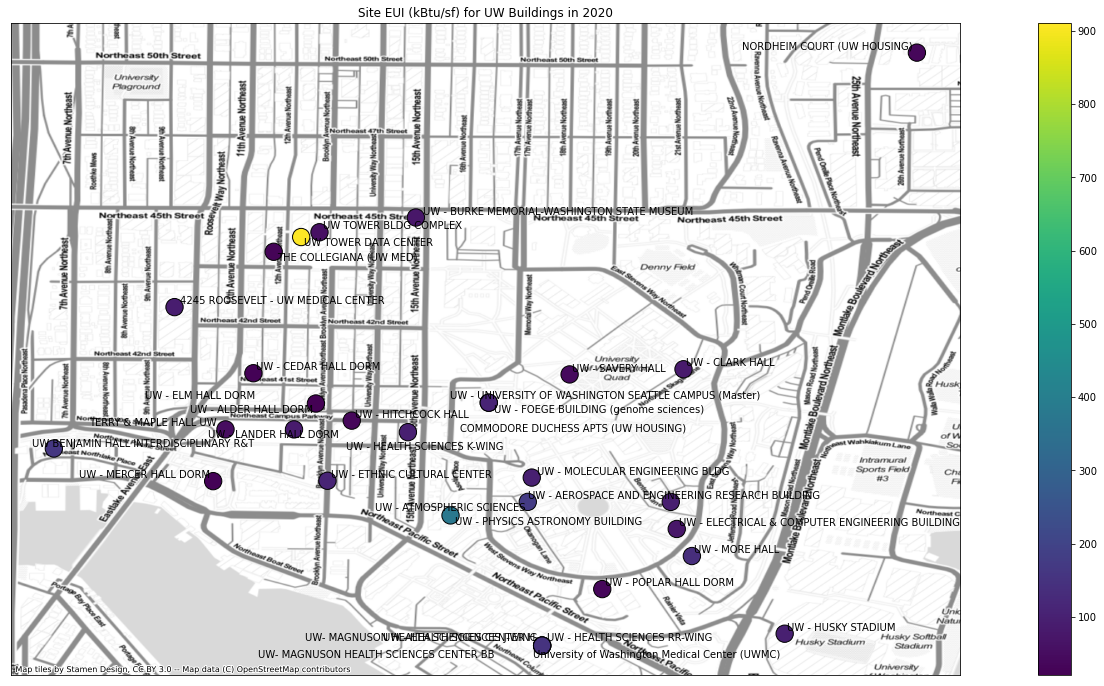

In [33]:
fig, ax = plt.subplots(figsize=(28, 12))
#uwfoot.plot(column="st_length_", ax=ax, legend=True, cmap='Greys')
gdf_eb_uw3.plot(column="SiteEUI(kBtu/sf)", ax=ax, legend=True, edgecolor='black', s=300);
cx.add_basemap(ax, crs=gdf_eb_uw3.crs, source=cx.providers.Stamen.TonerLite)

texts = []
for x,y, s in zip(gdf_eb_uw3.geometry.x,gdf_eb_uw3.geometry.y, gdf_eb_uw3.BuildingName):
    texts.append(plt.text(x,y, s));
adjust_text(texts);

ax.xaxis.set_major_locator(ticker.NullLocator())
# For y-axis
ax.yaxis.set_major_locator(ticker.NullLocator())

ax.set_title('Site EUI (kBtu/sf) for UW Buildings in 2020');



In [29]:
import io
from PIL import Image

import seaborn as sn

map1 = folium.Map(location=[47.655, -122.30],
                        zoom_start=15, tiles="openstreetmap", zoom_control=True ) 

map1